In [1]:
#import necessary libraries
from fastai import *
from fastai.vision import *
from sklearn.model_selection import StratifiedKFold

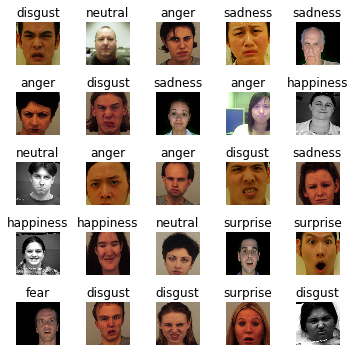

In [2]:
path = datapath4file('zip')
tfms = get_transforms()
data = (ImageList.from_folder(path)
        .split_by_rand_pct(valid_pct=0.2)
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch()).normalize(imagenet_stats)
data.show_batch(row=3, figsize=(5,5))

In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
df = data.to_df()

In [24]:
fastai_models = []
resnet34_learn = cnn_learner(data_fold, models.resnet34, metrics=error_rate)
resnet50_learn = cnn_learner(data_fold, models.resnet50, metrics=error_rate)
fastai_models.append(['resnet34', resnet34_learn])
fastai_models.append(['resnet50', resnet50_learn])

In [27]:
acc_val = []
results = []
for model in fastai_models:
    for train_index, val_index in skf.split(df.index, df['y']):
        data_fold = (ImageList.from_df(df, path)
            .split_by_idxs(train_index, val_index)
            .label_from_df()
            .transform(tfms, size=224)
            .databunch(num_workers=0)).normalize(imagenet_stats)
        learn = model[1]
        learn.fit_one_cycle(1)
        loss,acc = learn.validate()
        acc_val.append(acc)
    results.append([model[0], str(np.mean(acc_val))])

model name: resnet50 model_acc: 0.48188406


In [22]:
for result in results:
    print('model name: ' + result[0] + ' model_acc: ' + result[1])


0.6301383